# Clasificador Bayesiano

Este notebook implementa un **clasificador bayesiano manual** para predecir si una persona camina o conduce basándose en su edad e ingreso.

## Objetivo del Proyecto
Implementar manualmente desde cero un clasificador basado en el Teorema de Bayes General para entender cómo funciona la clasificación probabilística.

**Restricciones:**  no esta permitido el uso de clases externas como SciKitLearn, MGPy, PyMC, Keras, TensorFlow, etc. Todo será implementación manual.

## Dataset
- **100 instancias** con edad (18-75 años) e ingreso ($10,000-$60,000)
- **Clases**: "Camina" o "Conduce"
- **Objetivo**: Predecir el medio de transporte basado en características demográficas

## 1. Importar Librerías Necesarias

Importamos las librerías básicas permitidas para el análisis y visualización de datos:

In [17]:
# Importar librerías básicas para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualización (Planos)
plt.style.use('default')
sns.set_palette("bright")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Cargar y Explorar los datos de la Dataset

Importamos y Cargamos el dataset y revisamos el contenido para entender la estructura de los datos:

In [18]:
# Cargar el dataset desde CSV
# Ruta del dataset
df = pd.read_csv('data/dataset_walk_drive_publicado.csv')

print("=== INFORMACIÓN BÁSICA DEL DATASET ===")
print(f"Forma del dataset: {df.shape}")
print(f"Número de instancias: {df.shape[0]}")
print(f"Número de características: {df.shape[1]}")

print("\n=== PRIMERAS 10 FILAS ===")
print(df.head(10))

=== INFORMACIÓN BÁSICA DEL DATASET ===
Forma del dataset: (100, 3)
Número de instancias: 100
Número de características: 3

=== PRIMERAS 10 FILAS ===
   Edad  Ingreso    Clase
0    57    32961  Conduce
1    29    32610   Camina
2    25    30051   Camina
3    54    27654  Conduce
4    58    15846  Conduce
5    25    25793   Camina
6    41    26572  Conduce
7    23    21977   Camina
8    69    28387  Conduce
9    36    34040  Conduce


In [19]:
# Análisis exploratorio básico
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())

print("\n=== INFORMACIÓN SOBRE VALORES FALTANTES ===")
print(f"Valores nulos por columna:")
# isnull() = Detecta valores nulos
# sum() = Suma los valores nulos por columna
print(df.isnull().sum())

print("\n=== DISTRIBUCIÓN DE CLASES ===")
conteo_clases = df['Clase'].value_counts()
print(conteo_clases)

print("\n=== PROPORCIÓN DE CLASES ===")
proporciones = df['Clase'].value_counts(normalize=True)
print(proporciones.round(4))

=== ESTADÍSTICAS DESCRIPTIVAS ===
             Edad       Ingreso
count  100.000000    100.000000
mean    42.520000  30436.780000
std     16.936292   9427.696472
min     18.000000  10812.000000
25%     27.000000  22388.250000
50%     42.000000  31363.500000
75%     57.000000  35381.250000
max     74.000000  57201.000000

=== INFORMACIÓN SOBRE VALORES FALTANTES ===
Valores nulos por columna:
Edad       0
Ingreso    0
Clase      0
dtype: int64

=== DISTRIBUCIÓN DE CLASES ===
Clase
Conduce    64
Camina     36
Name: count, dtype: int64

=== PROPORCIÓN DE CLASES ===
Clase
Conduce    0.64
Camina     0.36
Name: proportion, dtype: float64


## 3. Visualización de los Datos

Creamos gráficos para entender visualmente las distribuciones y relaciones en los datos:

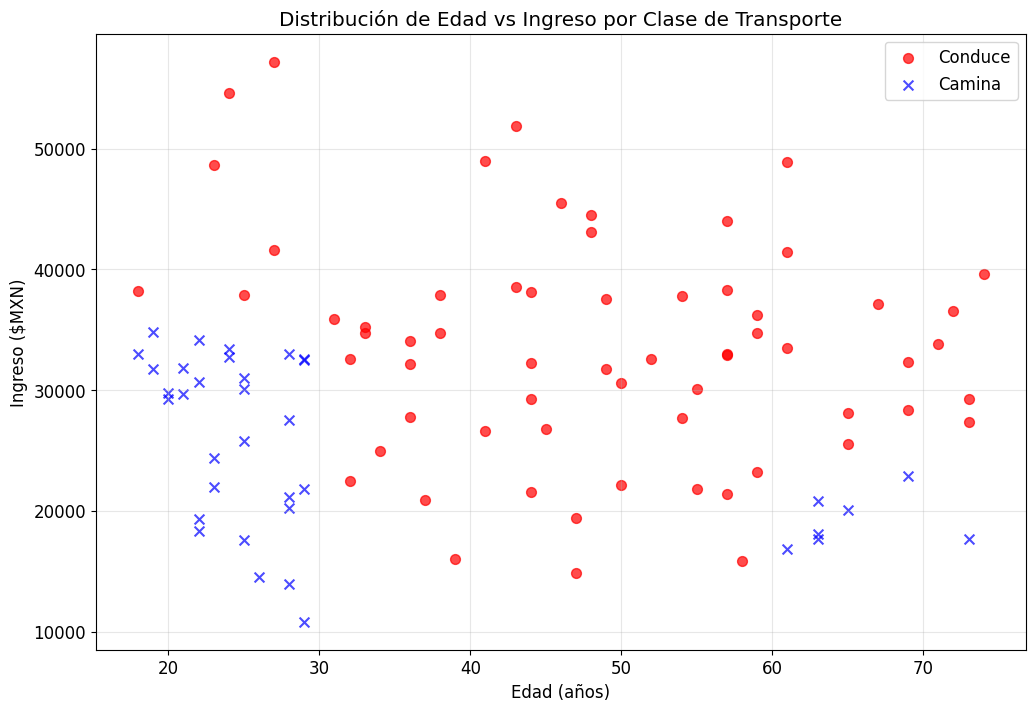

Este grafico se muestra la distribucion de las personas que caminan vs conducen
según su edad e ingreso.


In [20]:
# Gráfico de dispersión: Edad vs Ingreso por Clase
plt.figure(figsize=(12, 8))

# figuras diferentes por clase
marcadores = {'Camina': 'x', 'Conduce': 'o'}
colores = {'Camina': 'blue', 'Conduce': 'red'}

# Crear plano diferenciando por clase
for clase in df['Clase'].unique():
    datos_clase = df[df['Clase'] == clase]
    plt.scatter(
        datos_clase['Edad'],
        datos_clase['Ingreso'],
        label=clase,
        alpha=0.7,
        s=50,
        marker=marcadores[clase],
        color=colores[clase]
    )

plt.xlabel('Edad (años)')
plt.ylabel('Ingreso ($MXN)')
plt.title('Distribución de Edad vs Ingreso por Clase de Transporte')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Este grafico se muestra la distribucion de las personas que caminan vs conducen")
print("según su edad e ingreso.")

## Grafico de Histograma de Edad e Ingreso por Clase de Transporte (Box-Plot)

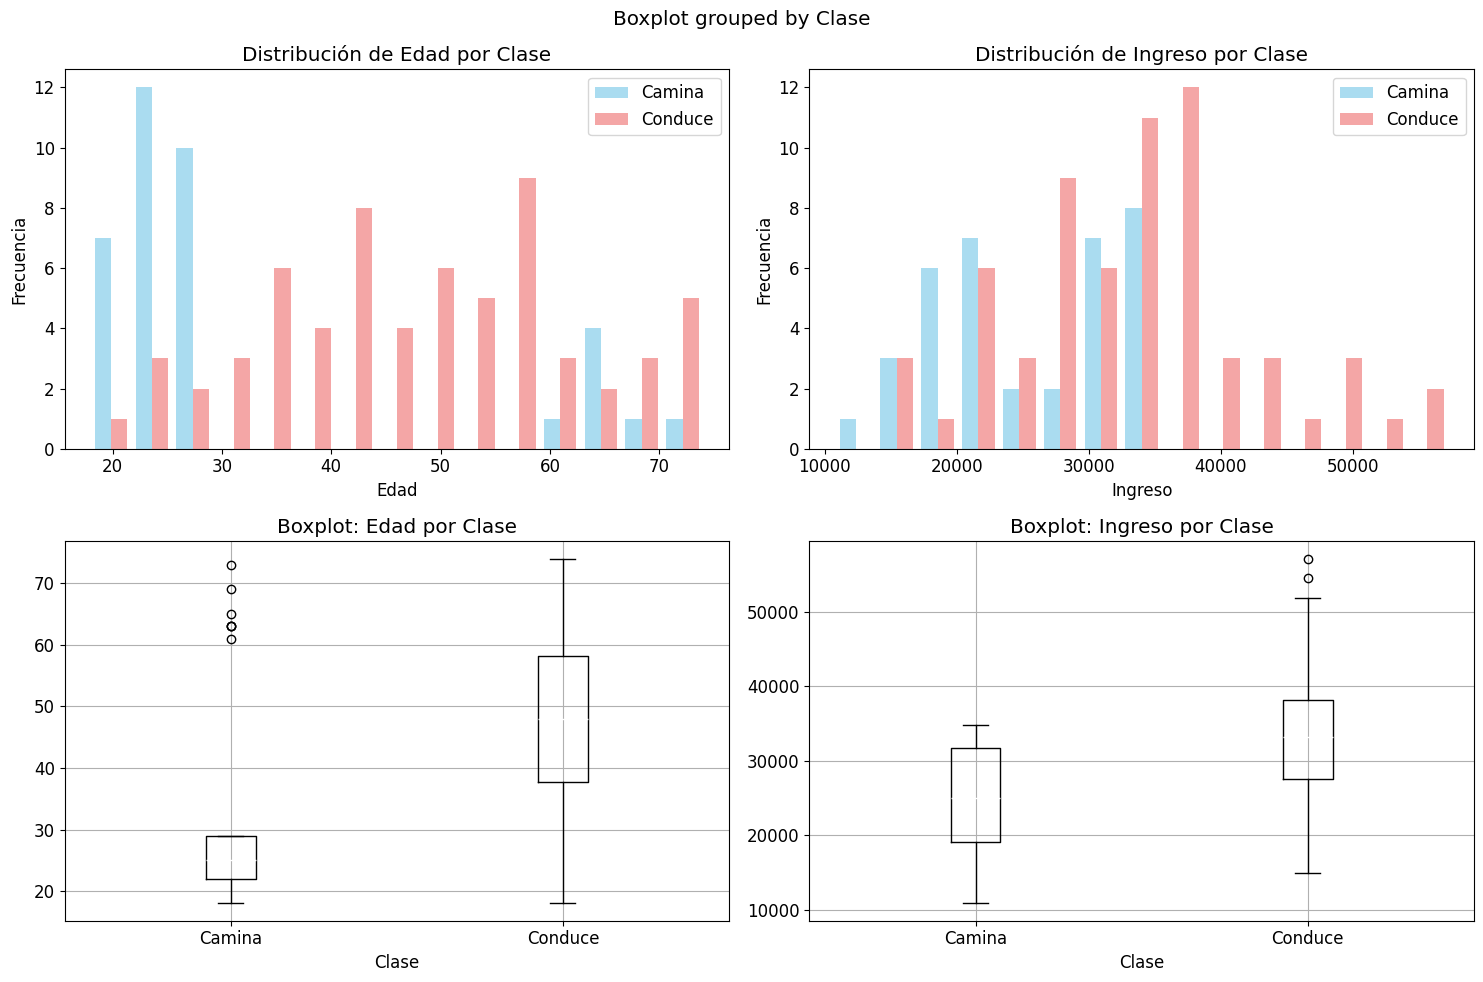

In [ ]:
# # Histogramas para visualizar distribuciones
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# # Distribución de Edad por Clase
# axes[0,0].hist([df[df['Clase']=='Camina']['Edad'], df[df['Clase']=='Conduce']['Edad']], 
#                bins=15, alpha=0.7, label=['Camina', 'Conduce'], color=['skyblue', 'lightcoral'])
# axes[0,0].set_xlabel('Edad')
# axes[0,0].set_ylabel('Frecuencia')
# axes[0,0].set_title('Distribución de Edad por Clase')
# axes[0,0].legend()

# # Distribución de Ingreso por Clase
# axes[0,1].hist([df[df['Clase']=='Camina']['Ingreso'], df[df['Clase']=='Conduce']['Ingreso']], 
#                bins=15, alpha=0.7, label=['Camina', 'Conduce'], color=['skyblue', 'lightcoral'])
# axes[0,1].set_xlabel('Ingreso')
# axes[0,1].set_ylabel('Frecuencia')
# axes[0,1].set_title('Distribución de Ingreso por Clase')
# axes[0,1].legend()

# # Boxplot de Edad por Clase
# df.boxplot(column='Edad', by='Clase', ax=axes[1,0])
# axes[1,0].set_title('Boxplot: Edad por Clase')
# axes[1,0].set_xlabel('Clase')

# # Boxplot de Ingreso por Clase
# df.boxplot(column='Ingreso', by='Clase', ax=axes[1,1])
# axes[1,1].set_title('Boxplot: Ingreso por Clase')
# axes[1,1].set_xlabel('Clase')

# plt.tight_layout()
# plt.show()

## 4. Preprocesamiento del dataset:
### Discretización (Binning)

Ahora vamos a discretizar las variables **Edad** e **Ingreso** en intervalos para hacer las categorías.

### ¿Por qué discretizar?
Es un proceso que requiere el clasificador bayesiano, donde su proceso es convertir variables numéricas continuas en variables categóricas o discretas (poner un rango).
- Las variables continuas tienen infinitos valores posibles
- Para el clasificador bayesiano necesitamos contar frecuencias
- Al agrupar en "bins" podemos calcular probabilidades más fácilmente

### Bins de Edad
| Categoría | Rango de años | Bin |
|-----------|:-------------:|:---:|
| Joven     | 18-29         | 0   |
|-----------|--------------|-----|
| Adulto    | 30-59         | 1   |
|-----------|--------------|-----|
| Mayor     | 60-75         | 2   |

### Bins de Ingreso
| Categoría | Rango de ingreso ($MXN) | Bin |
|-----------|:----------------------:|:---:|
| Muy bajo  | 10,000-19,999          | 0   |
|-----------|------------------------|-----|
| Bajo      | 20,000-29,999          | 1   |
|-----------|------------------------|-----|
| Medio     | 30,000-39,999          | 2   |
|-----------|------------------------|-----|
| Alto      | 40,000-49,999          | 3   |
|-----------|------------------------|-----|
| Muy alto  | 50,000-60,000          | 4   |

---

### Resumen de variables y bins utilizados
| Variable | Tipo original | Bins/Categorías | Rango de cada bin | Etiquetas |
|----------|:-------------:|:---------------:|:------------------|:---------|
| Edad     | Continua      | 3               | 18-29, 30-59, 60-75 | Joven, Adulto, Mayor |
| Ingreso  | Continua      | 5               | 10,000-19,999; 20,000-29,999; 30,000-39,999; 40,000-49,999; 50,000-60,000 | Muy bajo, Bajo, Medio, Alto, Muy alto |
| Clase    | Categórica    | 2               | -                | Camina, Conduce |

In [22]:
# Importar el módulo de preprocesamiento
import sys
sys.path.append('src')
from models.datos_preprocesados import PreprocesamientoDatos

# Crear instancia del preprocesador
preprocesador = PreprocesamientoDatos()

# Mostrar información de los bins que vamos a usar
print("=== CONFIGURACIÓN DE BINS ===")
info_bins = preprocesador.obtener_descripcion_bins()

print("\nBins para EDAD:")
for i, nombre in enumerate(info_bins['edad']['nombres']):
    print(f"  Bin {i}: {nombre}")

print("\nBins para INGRESO:")
for i, nombre in enumerate(info_bins['ingreso']['nombres']):
    print(f"  Bin {i}: {nombre}")

print(f"\nRangos específicos de edad: {info_bins['edad']['bins']}")
print(f"Rangos específicos de ingreso: {info_bins['ingreso']['bins']}")

=== CONFIGURACIÓN DE BINS ===

Bins para EDAD:
  Bin 0: Joven (18-29)
  Bin 1: Adulto (30-59)
  Bin 2: Mayor (60-75)

Bins para INGRESO:
  Bin 0: Muy bajo (10k-19,999k)
  Bin 1: Bajo (20k-29,999k)
  Bin 2: Medio (30k-39,999k)
  Bin 3: Alto (40k-49,999k)
  Bin 4: Muy alto (50k-60k)

Rangos específicos de edad: [17, 29, 59, 75]
Rangos específicos de ingreso: [9999, 19999, 29999, 39999, 49999, 60000]


In [23]:
# Aplicar el binning al dataset
print("=== APLICANDO DISCRETIZACIÓN ===")
df_procesado = preprocesador.aplicar_binning(df)

print(f"Dataset original: {df.shape}")
print(f"Dataset procesado: {df_procesado.shape}")

print("\n=== PRIMERAS 10 FILAS CON BINNING ===")
print(df_procesado[['Edad', 'Edad_bin', 'Ingreso', 'Ingreso_bin', 'Clase']].head(10))

# Mostrar estadísticas del binning
preprocesador.mostrar_estadisticas_binning(df, df_procesado)

=== APLICANDO DISCRETIZACIÓN ===
Dataset original: (100, 3)
Dataset procesado: (100, 5)

=== PRIMERAS 10 FILAS CON BINNING ===
   Edad  Edad_bin  Ingreso  Ingreso_bin    Clase
0    57         1    32961            2  Conduce
1    29         0    32610            2   Camina
2    25         0    30051            2   Camina
3    54         1    27654            1  Conduce
4    58         1    15846            0  Conduce
5    25         0    25793            1   Camina
6    41         1    26572            1  Conduce
7    23         0    21977            1   Camina
8    69         2    28387            1  Conduce
9    36         1    34040            2  Conduce
=== ESTADÍSTICAS DEL BINNING ===

--- DISTRIBUCIÓN POR BINS DE EDAD ---
Bin 0 - Joven (18-29): 35 personas (35.0%)
Bin 1 - Adulto (30-59): 45 personas (45.0%)
Bin 2 - Mayor (60-75): 20 personas (20.0%)

--- DISTRIBUCIÓN POR BINS DE INGRESO ---
Bin 0 - Muy bajo (10k-19,999k): 14 personas (14.0%)
Bin 1 - Bajo (20k-29,999k): 31 persona

## Graficos de la Discretización de Edad e Ingreso

A continuacion se muestra los graficos con los datos ya preprocesados. o discretizados.

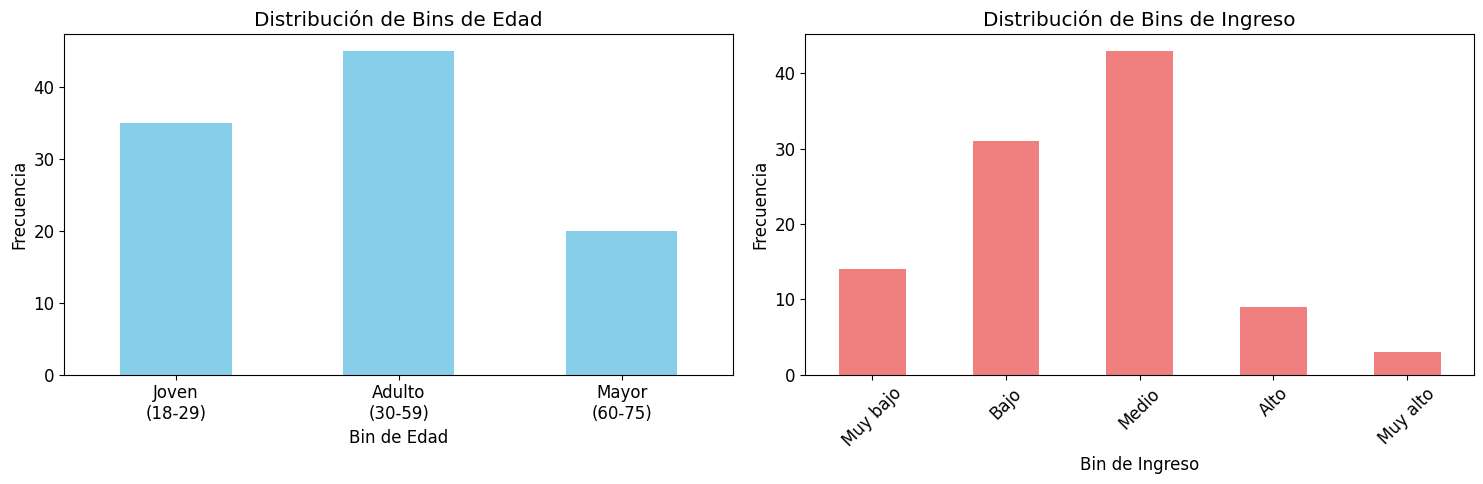

In [34]:
# Visualización de la discretización
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Solo 2 subplots, uno para cada gráfica

# Distribución de bins de edad
df_procesado['Edad_bin'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de Bins de Edad')
axes[0].set_xlabel('Bin de Edad')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticklabels(['Joven\n(18-29)', 'Adulto\n(30-59)', 'Mayor\n(60-75)'], rotation=0)

# Distribución de bins de ingreso
df_procesado['Ingreso_bin'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Distribución de Bins de Ingreso')
axes[1].set_xlabel('Bin de Ingreso')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticklabels(['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto'], rotation=45)

plt.tight_layout()
plt.show()

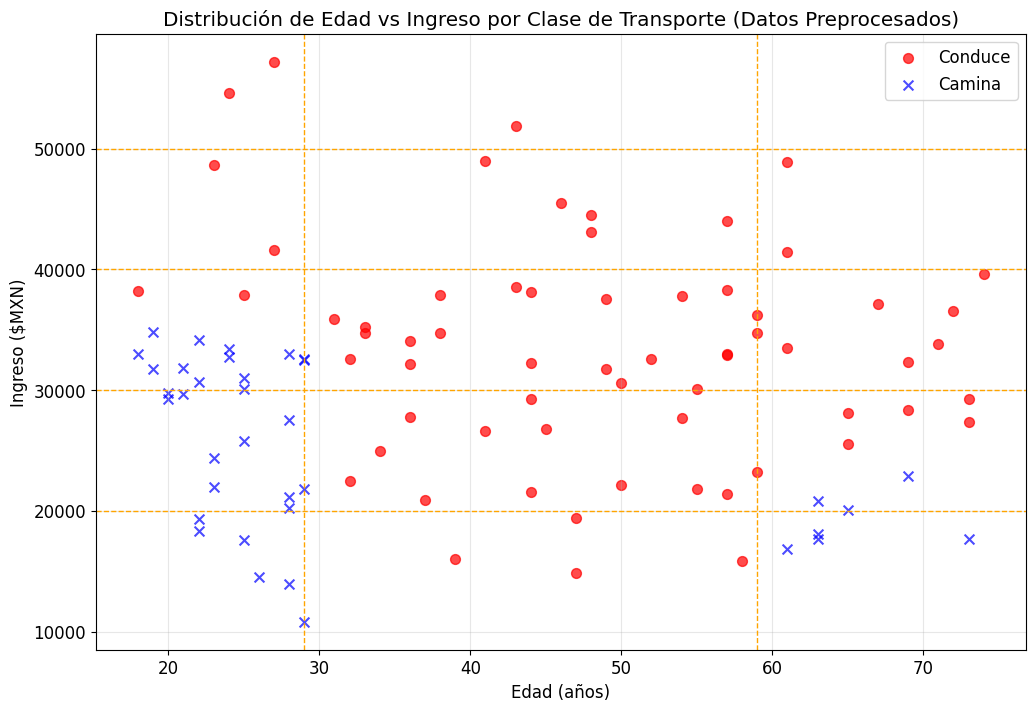

In [ ]:
# Gráfico de dispersión: Edad vs Ingreso por Clase con datos preprocesados y líneas de bins
plt.figure(figsize=(12, 8))

# Límites de los bins de edad e ingreso
bins_edad = [18, 29, 59, 75]
bins_ingreso = [10000, 19999, 29999, 39999, 49999, 60000]

# lineas verticales para los bins de edad
for limite in bins_edad[1:-1]:
    plt.axvline(x=limite, color='orange', linestyle='--', linewidth=1)

# lineas horizontales para los bins de ingreso
for limite in bins_ingreso[1:-1]:
    plt.axhline(y=limite, color='orange', linestyle='--', linewidth=1)

# figuras diferentes por clase
marcadores = {'Camina': 'x', 'Conduce': 'o'}
colores = {'Camina': 'blue', 'Conduce': 'red'}

# Usar el DataFrame procesado para graficar
for clase in df_procesado['Clase'].unique():
    datos_clase = df_procesado[df_procesado['Clase'] == clase]
    plt.scatter(
        datos_clase['Edad'],
        datos_clase['Ingreso'],
        label=clase,
        alpha=0.7,
        s=50,
        marker=marcadores[clase],
        color=colores[clase]
    )

plt.xlabel('Edad (años)')
plt.ylabel('Ingreso ($MXN)')
plt.title('Distribución de Edad vs Ingreso por Clase de Transporte (Datos Preprocesados)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("=== EJEMPLO PRACTICO DE BINNING ===")

# Tomar algunos ejemplos del dataset
ejemplos = df_procesado.head(5)
for idx, fila in ejemplos.iterrows():
    edad = fila['Edad']
    ingreso = fila['Ingreso']
    edad_bin = fila['Edad_bin']
    ingreso_bin = fila['Ingreso_bin']
    clase = fila['Clase']
    
    nombre_edad = preprocesador.nombres_edad[edad_bin]
    nombre_ingreso = preprocesador.nombres_ingreso[ingreso_bin]
    
    print(f"Persona {idx+1}:")
    print(f"  Edad: {edad} años → Bin {edad_bin} ({nombre_edad})")
    print(f"  Ingreso: ${ingreso:,} → Bin {ingreso_bin} ({nombre_ingreso})")
    print(f"  Clase real: {clase}")
    print()

print("Preprocesamiento completado. Las variables continuas han sido discretizadas.")
print("Ahora podemos proceder a calcular probabilidades usando conteo de frecuencias.")

=== EJEMPLO PRÁCTICO DE BINNING ===
Como ejemplo del proceso, veamos algunos casos específicos:
Persona 1:
  Edad: 57 años → Bin 1 (Adulto (30-59))
  Ingreso: $32,961 → Bin 2 (Medio (30k-39,999k))
  Clase real: Conduce

Persona 2:
  Edad: 29 años → Bin 0 (Joven (18-29))
  Ingreso: $32,610 → Bin 2 (Medio (30k-39,999k))
  Clase real: Camina

Persona 3:
  Edad: 25 años → Bin 0 (Joven (18-29))
  Ingreso: $30,051 → Bin 2 (Medio (30k-39,999k))
  Clase real: Camina

Persona 4:
  Edad: 54 años → Bin 1 (Adulto (30-59))
  Ingreso: $27,654 → Bin 1 (Bajo (20k-29,999k))
  Clase real: Conduce

Persona 5:
  Edad: 58 años → Bin 1 (Adulto (30-59))
  Ingreso: $15,846 → Bin 0 (Muy bajo (10k-19,999k))
  Clase real: Conduce

✅ Preprocesamiento completado. Las variables continuas han sido discretizadas.
✅ Ahora podemos proceder a calcular probabilidades usando conteo de frecuencias.
